In [1]:
import pandas as pd
import numpy as np

# Load the dataset
data = pd.read_csv('myexcel.csv')


In [3]:
# Print the Dataset info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 458 entries, 0 to 457
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      458 non-null    object 
 1   Team      458 non-null    object 
 2   Number    458 non-null    int64  
 3   Position  458 non-null    object 
 4   Age       458 non-null    int64  
 5   Height    458 non-null    object 
 6   Weight    458 non-null    int64  
 7   College   374 non-null    object 
 8   Salary    447 non-null    float64
dtypes: float64(1), int64(3), object(5)
memory usage: 32.3+ KB


In [5]:
# Preview of Dataset
data.head()

,Name,Team,Number,Position,Age,Height,Weight,College,Salary
0,Avery Bradley,Boston Celtics,0,PG,25,06-Feb,180,Texas,7730337.0
1,Jae Crowder,Boston Celtics,99,SF,25,06-Jun,235,Marquette,6796117.0
2,John Holland,Boston Celtics,30,SG,27,06-May,205,Boston University,NaN
3,R.J. Hunter,Boston Celtics,28,SG,22,06-May,185,Georgia State,1148640.0
4,Jonas Jerebko,Boston Celtics,8,PF,29,06-Oct,231,NaN,5000000.0


# Preprocessing the Dataset

In [13]:
# Remove duplicates
data = data.drop_duplicates()

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 458 entries, 0 to 457
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      458 non-null    object 
 1   Team      458 non-null    object 
 2   Number    458 non-null    int64  
 3   Position  458 non-null    object 
 4   Age       458 non-null    int64  
 5   Height    458 non-null    object 
 6   Weight    458 non-null    int64  
 7   College   374 non-null    object 
 8   Salary    447 non-null    float64
dtypes: float64(1), int64(3), object(5)
memory usage: 32.3+ KB


In [15]:
# Replace the "height" column with random numbers between 150 and 180

data['Height'] = np.random.randint(150, 181, size=len(data))
print("\nUpdated 'height' column with random values between 150 and 180.")
data.head()


Updated 'height' column with random values between 150 and 180.


,Name,Team,Number,Position,Age,Height,Weight,College,Salary
0,Avery Bradley,Boston Celtics,0,PG,25,157,180,Texas,7730337.0
1,Jae Crowder,Boston Celtics,99,SF,25,157,235,Marquette,6796117.0
2,John Holland,Boston Celtics,30,SG,27,166,205,Boston University,NaN
3,R.J. Hunter,Boston Celtics,28,SG,22,156,185,Georgia State,1148640.0
4,Jonas Jerebko,Boston Celtics,8,PF,29,167,231,NaN,5000000.0


# Data Analysis


### Task 1: Determine Team Distribution and Percentage Split


In [124]:
#Determine Team Distribution 

team_distribution = data['Team'].value_counts()

#Determine Percentage split
team_percentage = (team_distribution / len(data)) * 100

print("\nTeam Distribution:")
print(team_distribution)
print("\nTeam Percentage Split:")
print(team_percentage)



Team Distribution:
Team
New Orleans Pelicans      19
Memphis Grizzlies         18
Utah Jazz                 16
New York Knicks           16
Milwaukee Bucks           16
Brooklyn Nets             15
Portland Trail Blazers    15
Oklahoma City Thunder     15
Denver Nuggets            15
Washington Wizards        15
Miami Heat                15
Charlotte Hornets         15
Atlanta Hawks             15
San Antonio Spurs         15
Houston Rockets           15
Boston Celtics            15
Indiana Pacers            15
Detroit Pistons           15
Cleveland Cavaliers       15
Chicago Bulls             15
Sacramento Kings          15
Phoenix Suns              15
Los Angeles Lakers        15
Los Angeles Clippers      15
Golden State Warriors     15
Toronto Raptors           15
Philadelphia 76ers        15
Dallas Mavericks          15
Orlando Magic             14
Minnesota Timberwolves    14
Name: count, dtype: int64

Team Percentage Split:
Team
New Orleans Pelicans      4.148472
Memphis Grizzli

### Graphical Representation: Team Distribution


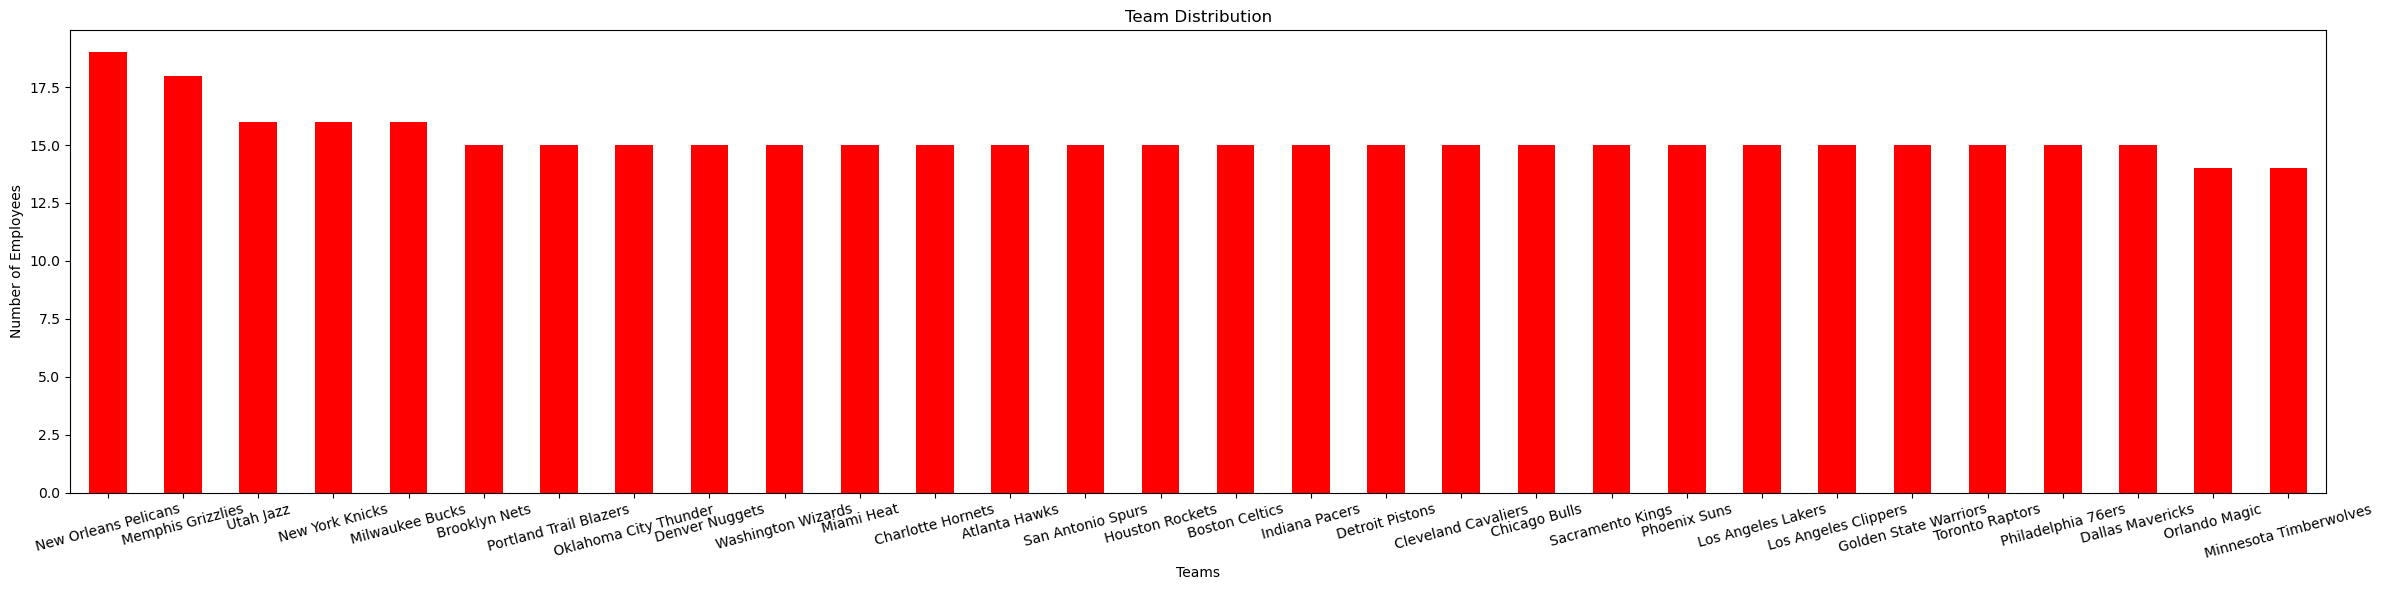

In [26]:

# Graphical Representation: Team Distribution

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(24, 6))
team_distribution.plot(kind='bar', color='red', title='Team Distribution')
plt.ylabel('Number of Employees')
plt.xlabel('Teams')
plt.xticks(rotation=15)
plt.tight_layout()

plt.show()

### Task 2: Segregate Employees by Positions


In [66]:
#Segregate Employees by Positions

position_distribution = data['Position'].value_counts()

print("\nPosition Distribution:")
print(position_distribution)





Position Distribution:
Position
SG    102
PF    100
PG     92
SF     85
C      79
Name: count, dtype: int64


### Graphical Representation: Position Distribution


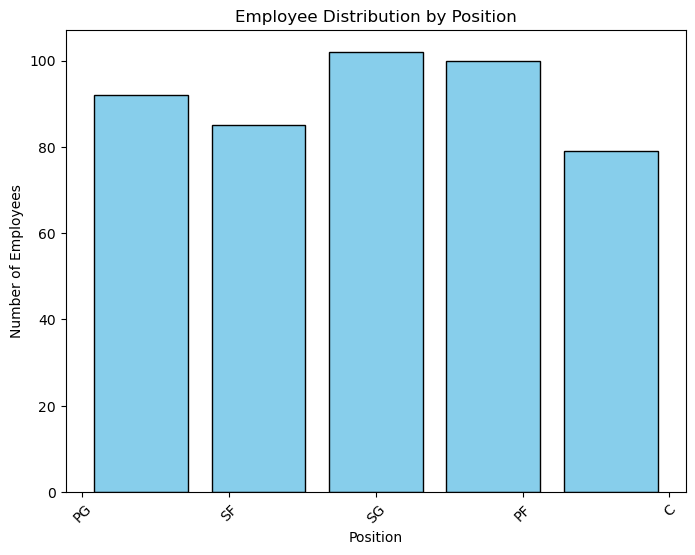

In [121]:
# Histogram for position distribution

plt.figure(figsize=(8, 6))
plt.hist(data['Position'], bins=len(position_distribution), color='skyblue', edgecolor='black', rwidth=0.8)

plt.title("Employee Distribution by Position")
plt.xlabel("Position")
plt.ylabel("Number of Employees")
plt.xticks(rotation=45)
plt.show()

### Task 3: Predominant Age Group

In [73]:
# Predominant Age Group
# Age is given in discrete values. First, we can add a column age groups to dataset

age_bins = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 200]
age_labels = ['0-10', '10-20', '20-30', '30-40', '40-50', '50-60', '60-70', '70-80', '80-90', '90-100', '100+']

data['Age Group'] = pd.cut(data['Age'], bins=age_bins, labels=age_labels)
data.head()

,Name,Team,Number,Position,Age,Height,Weight,College,Salary,Age Group
0,Avery Bradley,Boston Celtics,0,PG,25,157,180,Texas,7730337.0,20-30
1,Jae Crowder,Boston Celtics,99,SF,25,157,235,Marquette,6796117.0,20-30
2,John Holland,Boston Celtics,30,SG,27,166,205,Boston University,NaN,20-30
3,R.J. Hunter,Boston Celtics,28,SG,22,156,185,Georgia State,1148640.0,20-30
4,Jonas Jerebko,Boston Celtics,8,PF,29,167,231,NaN,5000000.0,20-30


In [54]:
# Now, we can count the number of employees in different age groups

age_group_distribution = data['Age Group'].value_counts()
print("\nAge Group Distribution:")
print(age_group_distribution)
print("\nPredominant Age Group:", age_group_distribution.idxmax())


Age Group Distribution:
Age Group
20-30     346
30-40      91
10-20      21
0-10        0
40-50       0
50-60       0
60-70       0
70-80       0
80-90       0
90-100      0
100+        0
Name: count, dtype: int64

Predominant Age Group: 20-30


### Graphical Representation: Age Group Distribution


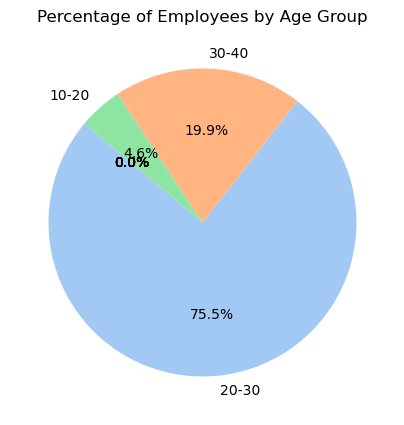

In [109]:

# Pie chart for age group distribution

plt.figure(figsize=(5, 5))
age_group_distribution.plot(kind='pie', autopct='%1.1f%%', startangle=140, colors=sns.color_palette('pastel'))

plt.title("Percentage of Employees by Age Group")
plt.ylabel("")  
plt.show()

### Task 4: Team and Position with Highest Salary Expenditure


In [82]:
#Team and Position with Highest Salary Expenditure

salary_expenditure = data.groupby(['Team', 'Position'])['Salary'].sum().reset_index()
highest_salary_expenditure = salary_expenditure.sort_values(by='Salary', ascending=False).head(1)

print("\nTeam and Position with Highest Salary Expenditure:")
print(highest_salary_expenditure)


Team and Position with Highest Salary Expenditure:
                  Team Position      Salary
67  Los Angeles Lakers       SF  31866445.0


#### Graphical Representation: Salary Expenditure by Team and Position


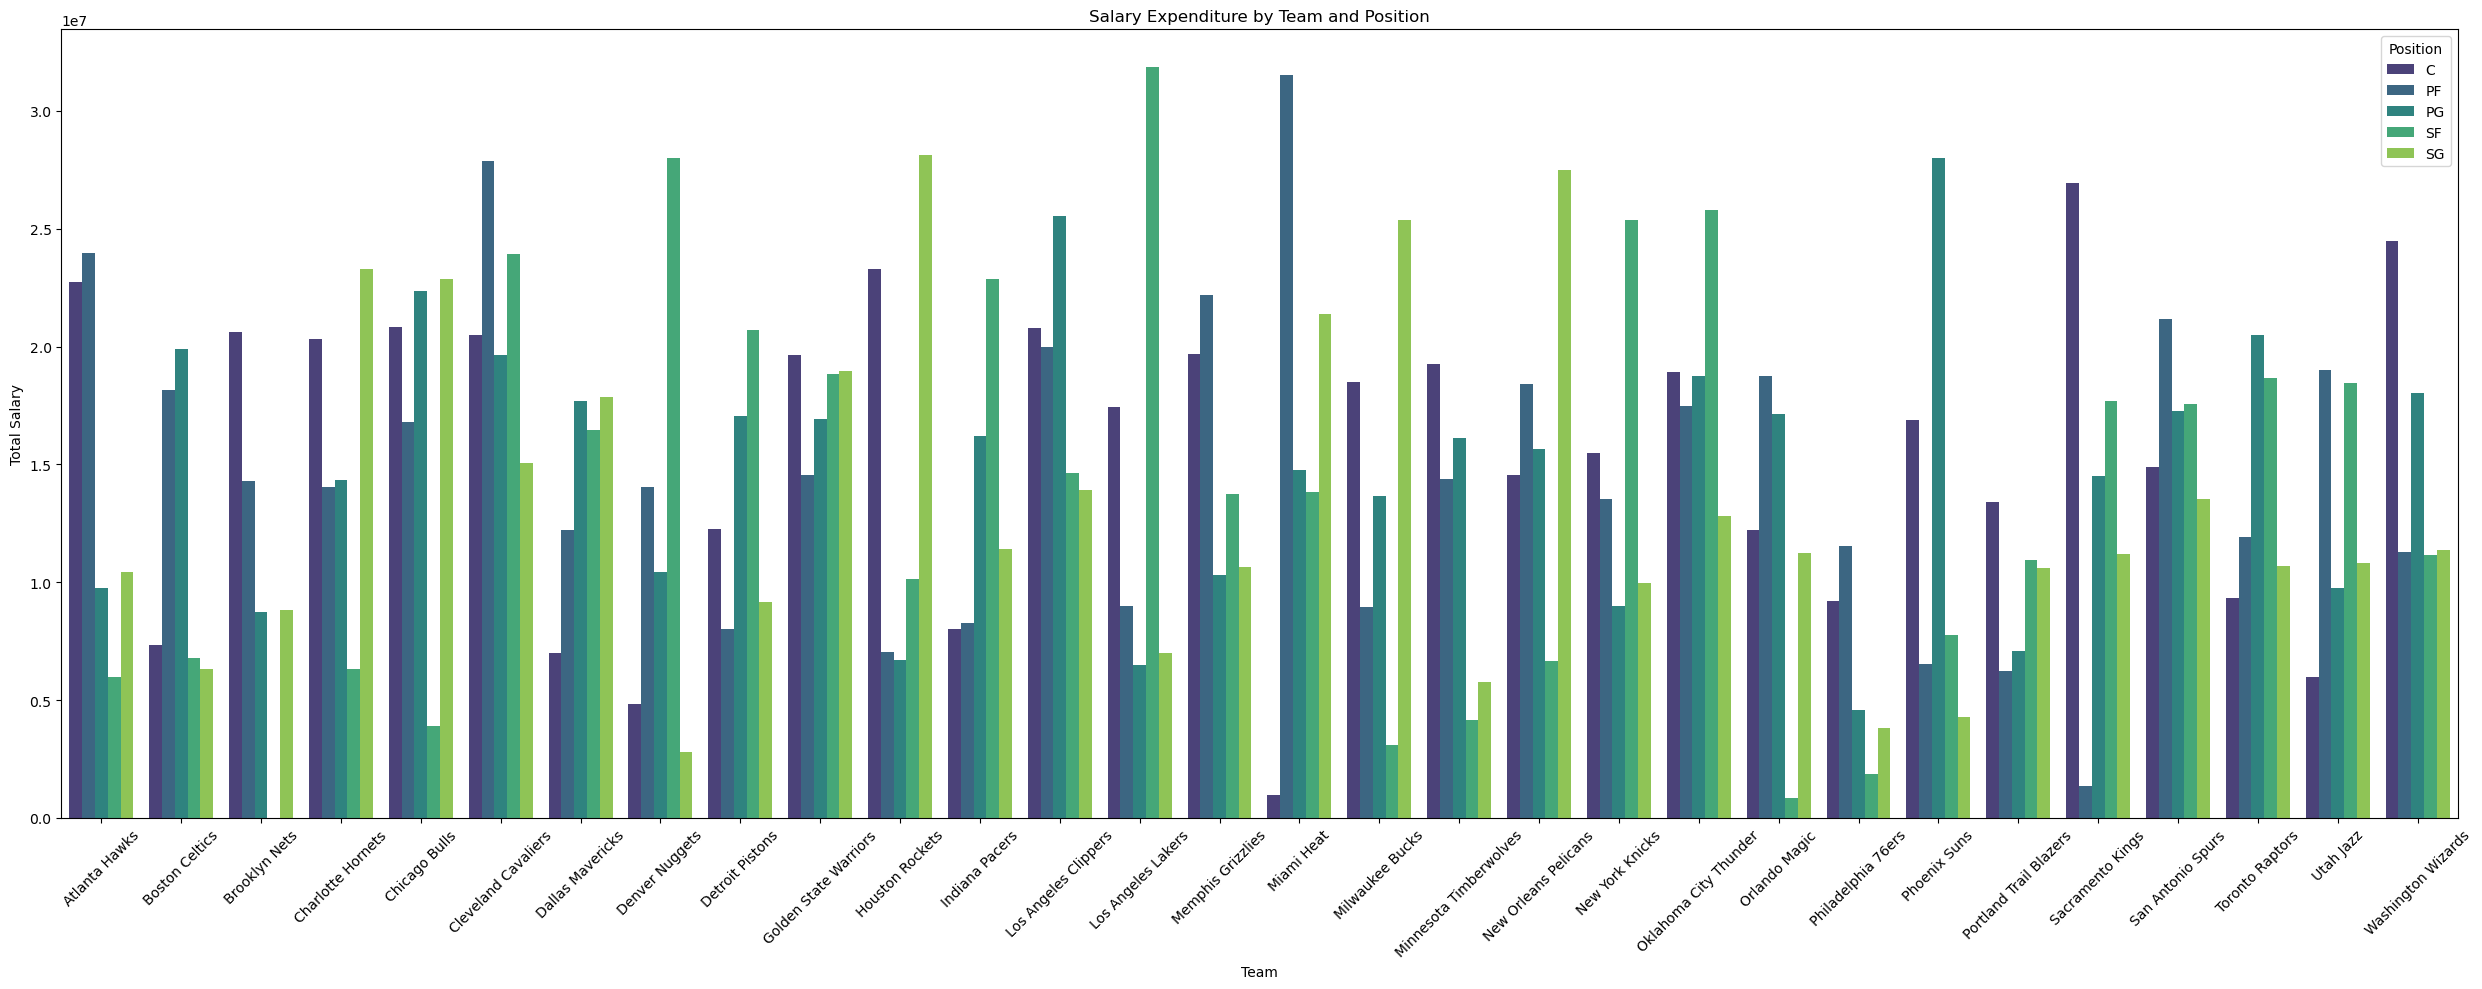

In [113]:
# Graphical Representation: Salary Expenditure by Team and Position

plt.figure(figsize=(25, 10))
sns.barplot(data=salary_expenditure, x='Team', y='Salary', hue='Position', palette='viridis')
plt.title('Salary Expenditure by Team and Position')
plt.ylabel('Total Salary')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### Task 5: Correlation Between Age and Salary


In [99]:
# Correlation Between Age and Salary

correlation = data['Age'].corr(data['Salary'])

print("\nCorrelation Between Age and Salary:", correlation)




Correlation Between Age and Salary: 0.21400941226570971


### Graphical Representation: Correlation Between Age and Salary


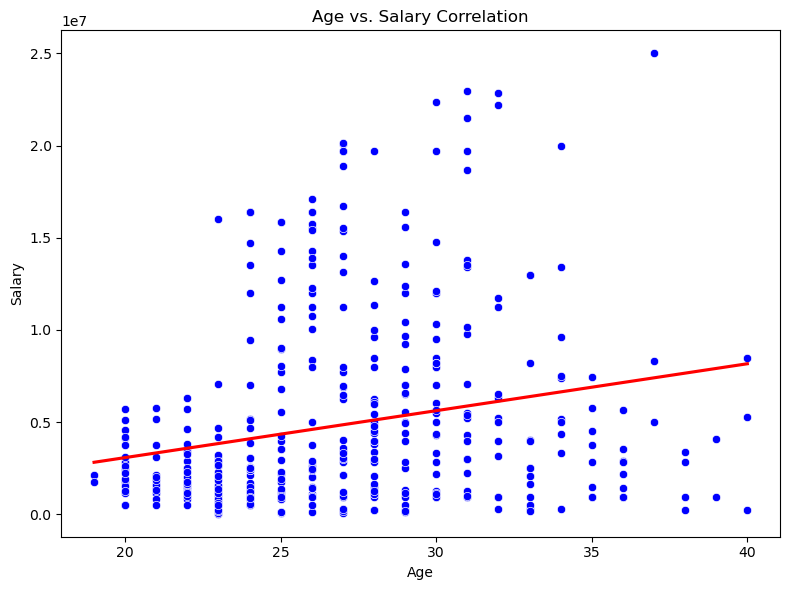

In [117]:
# Graphical Representation: Correlation Between Age and Salary

plt.figure(figsize=(8, 6))
sns.scatterplot(data=data, x='Age', y='Salary', color='blue')
sns.regplot(data=data, x='Age', y='Salary', scatter=False, color='red', ci=None)
plt.title('Age vs. Salary Correlation')
plt.xlabel('Age')
plt.ylabel('Salary')
plt.tight_layout()
plt.show()

### Insights and Data Story
### Based on the analysis, the following insights were gained:


#### 1. Employee Distribution by Team: "New Orleans Pelicans team has the highest proportion of employees.


#### 2. Segregation by Position: Position 'SG ' has more number of employees. 102 employees are in the position SG. Position 'C' has the least number of employees, only 79


#### 3. Predominant Age Group: The predominant age group could indicate the company's hiring patterns or focus on a particular demographic.Here the predominant age group is 20-30. 75.5% of employees belong to this age group.


#### 4. Salary Expenditure:  Team 'Los Angeles Lakers' and position 'SF' have the highest salary expenditure of 31866445.0


#### 5. Age vs Salary Correlation: Correlation Between Age and Salary: 0.21400941226570971 which means that there is a small positive correlation between the variables and the variables may be considered as independent.  
